# Helpers

image filters

In [ ]:
from PIL import Image, ImageCms

def transprent_to_white(im,i=20):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[3]<=i:
	        newData.append((255, 255, 255, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def transprent_to_black(im,i=20):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[3]<=i:
	        newData.append((0, 0, 0, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def black_to_transprent(im,i=50):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] <= i and item[1] <= i and item[2] <= i:
	        newData.append((0, 0, 0, 0)) # for lower image size
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def white_to_transprent(im,i=150):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] >= i and item[1] >= i and item[2] >= i:
	        newData.append((0, 0, 0, 0))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def black_to_white(im,i=50):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] <= i and item[1] <= i and item[2] <= i:
	        newData.append((255, 255, 255, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def white_to_black(im,i=220):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] >= i and item[1] >= i and item[2] >= i:
	        newData.append((0, 0, 0, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def black_to_black(im,i=50):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] <= i and item[1] <= i and item[2] <= i:
	        newData.append((0, 0, 0, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

def white_to_white(im,i=220):
	img = Image.open(im)
	img = img.convert("RGBA")
	datas = img.getdata()
	newData = []
	for item in datas:
	    if item[0] >= i and item[1] >= i and item[2] >= i:
	        newData.append((255, 255, 255, 255))
	    else:
	        newData.append(item)
	img.putdata(newData)
	img.save(im, "PNG")

image components

In [ ]:
from PIL import Image, ImageCms

im = Image.open('new.png')
(red, blue, green, A1) = im.split()
red.save('red.png')
green.save('green.png')
blue.save('blue.png')
A1.save('A1.png')

hsv = im.convert('HSV')
(hue, sat, val) = hsv.split()
hue.save('hue.png')
sat.save('sat.png')
val.save('val.png')

cmyk = im.convert('CMYK')
(cyan, magenta, yellow , A2) = im.split()
cyan.save('cyan.png')
magenta.save('magenta.png')
yellow.save('yellow.png')
A2.save('A2.png')

# Convert to L*a*b colorspace is more complex:
rgb = ImageCms.createProfile(colorSpace='sRGB')
lab = ImageCms.createProfile(colorSpace='LAB')
transform = ImageCms.buildTransform(inputProfile=rgb, outputProfile=lab, inMode='RGB', outMode='LAB')
lab_im = ImageCms.applyTransform(im=im, transform=transform)
l, a, b = lab_im.split()
l.save("l.png")
a.save('a.png')
b.save('b.png')

# Solvers

install pytesseract

In [2]:
%%capture
!sudo apt install tesseract-ocr
!pip install pytesseract

install right Pillow

In [ ]:
%%capture
!pip install Pillow==9.1.0

image cap solver

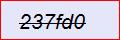

237fd0



In [4]:
import cv2
from PIL import Image
from IPython.display import display

def create_mask(image, maskfname = "mask.png"):
	imageincv2 = cv2.imread(image) # open image in cv2
	gray = cv2.cvtColor(imageincv2, cv2.COLOR_BGR2GRAY) # convert it to grayscale
	thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] # pick only thresholded pixels (horizontal line)
	horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1)) # create new structuring element (black)
	maskincv2 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,horizontal_kernel, iterations=2) # create mask with thresolded lines and black background
	#maskincv2 = cv2.bitwise_not(maskincv2) # converts white to black and black to white (0 to 255 and 255 to 0)(rgb values)
	cv2.imwrite(maskfname, maskincv2) # save mask
	return maskfname

def transparent_mask(maskfname):
	maskinpillow = Image.open(maskfname) # open mask in pillow
	rgbaconvertedmask = maskinpillow.convert("RGBA") # convert it to rgba
	datas = rgbaconvertedmask.getdata() # get datas list object for processing
	newData = [] # create new empty data list
	for item in datas: # for every pixel
	    if item[0] == 0 and item[1] == 0 and item[2] == 0: # if r,g&b is 0 that is black(0,0,0) pixel
	        newData.append((0,0,0,0)) # then make new pixel transparent by setting opacity(A) to 0 (no mater what other values are) 
	    else:
	        newData.append(item) # otherwise append original black pixel
	rgbaconvertedmask.putdata(newData) # put new data list back to mask
	return rgbaconvertedmask 

def apply_mask(image, rgbaconvertedmask, maskedimagefname = "maskedimage.png"):
	background = Image.open(image) # open original image in pillow
	display(background)
	backgroundconverted = background.convert("RGBA") # convert it to rgba
	backgroundconverted.paste(rgbaconvertedmask,mask=rgbaconvertedmask) # paste mask on converted background
	backgroundconverted.save(maskedimagefname,"PNG") # save masked image
	return maskedimagefname

from PIL import Image, ImageCms, ImageFilter
import pytesseract

def get_text(im):
	im = Image.open(im) # open masked image in pillow from function argument(parameter)
	croppedim = im.crop((5,5,115,35)) # crop image
	rgb = ImageCms.createProfile(colorSpace='sRGB') # create rgb profile
	lab = ImageCms.createProfile(colorSpace='LAB') # create lab profile
	transform = ImageCms.buildTransform(inputProfile=rgb, outputProfile=lab, inMode='RGB', outMode='LAB') # create rgb to lab transformer
	lab_im = ImageCms.applyTransform(im=croppedim, transform=transform) # transform cropped image by applying above transformer
	l, a, b = lab_im.split() # split l,a&b component
	workingimage = l # selecting l component
	filteredimage = workingimage.filter(ImageFilter.MinFilter(3)) # filter image
	result = pytesseract.image_to_string(filteredimage) # predict text on filteredimage using pytesseract ocr
	print(result)
	# l=[]
	# l.append(result)
	# l.append(result.strip())
	# print(l)
	# print(l[0])
	# print(l[1])

path_or_url_to_image = "CAPTCHA.jpg"

get_text(apply_mask(path_or_url_to_image, transparent_mask(create_mask(path_or_url_to_image))))

web cap solver (get image + image cap solver)

In [7]:
from bs4 import BeautifulSoup
import requests
import shutil

website_url = "https://www.students.gtu.ac.in/"
captcha_url = "https://www.students.gtu.ac.in/Handler.ashx"

r = requests.get(captcha_url, stream=True)
if r.status_code == 200:
   with open("CAPTCHA.jpg", 'wb') as f: 
      r.raw.decode_content = True
      shutil.copyfileobj(r.raw, f)

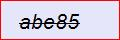

abe85



In [8]:
import cv2
from PIL import Image
from IPython.display import display

def create_mask(image, maskfname = "mask.png"):
	imageincv2 = cv2.imread(image) # open image in cv2
	gray = cv2.cvtColor(imageincv2, cv2.COLOR_BGR2GRAY) # convert it to grayscale
	thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] # pick only thresholded pixels (horizontal line)
	horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1)) # create new structuring element (black)
	maskincv2 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,horizontal_kernel, iterations=2) # create mask with thresolded lines and black background
	#maskincv2 = cv2.bitwise_not(maskincv2) # converts white to black and black to white (0 to 255 and 255 to 0)(rgb values)
	cv2.imwrite(maskfname, maskincv2) # save mask
	return maskfname

def transparent_mask(maskfname):
	maskinpillow = Image.open(maskfname) # open mask in pillow
	rgbaconvertedmask = maskinpillow.convert("RGBA") # convert it to rgba
	datas = rgbaconvertedmask.getdata() # get datas list object for processing
	newData = [] # create new empty data list
	for item in datas: # for every pixel
	    if item[0] == 0 and item[1] == 0 and item[2] == 0: # if r,g&b is 0 that is black(0,0,0) pixel
	        newData.append((0,0,0,0)) # then make new pixel transparent by setting opacity(A) to 0 (no mater what other values are) 
	    else:
	        newData.append(item) # otherwise append original black pixel
	rgbaconvertedmask.putdata(newData) # put new data list back to mask
	return rgbaconvertedmask 

def apply_mask(image, rgbaconvertedmask, maskedimagefname = "maskedimage.png"):
	background = Image.open(image) # open original image in pillow
	display(background)
	backgroundconverted = background.convert("RGBA") # convert it to rgba
	backgroundconverted.paste(rgbaconvertedmask,mask=rgbaconvertedmask) # paste mask on converted background
	backgroundconverted.save(maskedimagefname,"PNG") # save masked image
	return maskedimagefname

from PIL import Image, ImageCms, ImageFilter
import pytesseract

def get_text(im):
	im = Image.open(im) # open masked image in pillow from function argument(parameter)
	croppedim = im.crop((5,5,115,35)) # crop image
	rgb = ImageCms.createProfile(colorSpace='sRGB') # create rgb profile
	lab = ImageCms.createProfile(colorSpace='LAB') # create lab profile
	transform = ImageCms.buildTransform(inputProfile=rgb, outputProfile=lab, inMode='RGB', outMode='LAB') # create rgb to lab transformer
	lab_im = ImageCms.applyTransform(im=croppedim, transform=transform) # transform cropped image by applying above transformer
	l, a, b = lab_im.split() # split l,a&b component
	workingimage = l # selecting l component
	filteredimage = workingimage.filter(ImageFilter.MinFilter(3)) # filter image
	result = pytesseract.image_to_string(filteredimage) # predict text on filteredimage using pytesseract ocr
	print(result)
	# l=[]
	# l.append(result)
	# l.append(result.strip())
	# print(l)
	# print(l[0])
	# print(l[1])

path_or_url_to_image = "CAPTCHA.jpg"

get_text(apply_mask(path_or_url_to_image, transparent_mask(create_mask(path_or_url_to_image))))